<a href="https://colab.research.google.com/github/Aman-k-s/CropSIH25/blob/main/models/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!pip install torch torchvision matplotlib scikit-learn


Mounted at /content/drive


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm

DATASET_PATH = '/content/drive/MyDrive/cropdata'
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(DATASET_PATH, transform=transform)
class_names = train_data.classes  # ['healthy','Stressed']
print("Classes:", class_names)

# Split train/val (80-20)
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_ds, val_ds = torch.utils.data.random_split(train_data, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)


Classes: ['Stressed', 'healthy']


In [5]:
model = models.mobilenet_v2(weights="IMAGENET1K_V1")
model.classifier[1] = nn.Linear(model.last_channel, 1)  # Binary output
model = model.to(DEVICE)

criterion = nn.BCEWithLogitsLoss()  # for binary classification
optimizer = optim.Adam(model.parameters(), lr=1e-4)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 26.5MB/s]


In [ ]:
"}|||"}
"}||}""}}}}}}"}
'''

"}||
"}|||||||||||||||||||||||||

"}||||||||||EPOCHS = 5
train_loss, val_loss, val_acc = [], [], []

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0
    for imgs, labels in tqdm(train_loader):
        imgs, labels = imgs.to(DEVICE), labels.unsqueeze(1).float().to(DEVICE)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss.append(running_loss/len(train_loader))

    # Validation
    model.eval()
    v_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(DEVICE), labels.unsqueeze(1).float().to(DEVICE)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            v_loss += loss.item()
            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels.bool()).sum().item()
            total += labels.size(0)

    val_loss.append(v_loss/len(val_loader))
    acc = correct / total
    val_acc.append(acc)
    print(f"Epoch [{epoch+1}/{EPOCHS}] Train Loss: {train_loss[-1]:.4f} | Val Loss: {val_loss[-1]:.4f} | Val Acc: {acc:.4f}")


100%|██████████| 128/128 [24:42<00:00, 11.58s/it]


Epoch [1/5] Train Loss: 0.0755 | Val Loss: 0.0070 | Val Acc: 0.9990


100%|██████████| 128/128 [14:36<00:00,  6.85s/it]


Epoch [2/5] Train Loss: 0.0163 | Val Loss: 0.0158 | Val Acc: 0.9980


100%|██████████| 128/128 [14:09<00:00,  6.63s/it]


Epoch [3/5] Train Loss: 0.0100 | Val Loss: 0.0093 | Val Acc: 0.9990


100%|██████████| 128/128 [14:16<00:00,  6.69s/it]


Epoch [4/5] Train Loss: 0.0067 | Val Loss: 0.0106 | Val Acc: 0.9971


100%|██████████| 128/128 [14:08<00:00,  6.63s/it]


Epoch [5/5] Train Loss: 0.0053 | Val Loss: 0.0097 | Val Acc: 0.9990


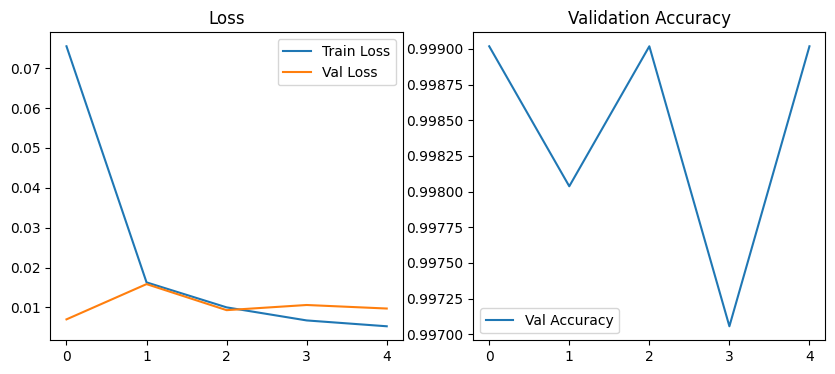

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.legend(); plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(val_acc, label="Val Accuracy")
plt.legend(); plt.title("Validation Accuracy")
plt.show()


In [8]:
MODEL_PATH = "/content/drive/MyDrive/crop_health_model.pth"
torch.save(model.state_dict(), MODEL_PATH)
print(f" Model saved to {MODEL_PATH}")


 Model saved to /content/drive/MyDrive/crop_health_model.pth
